# Fire Data Analysis

### 1. Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 2. Importing Fire History Dataset

In [2]:
fire_df = pd.read_csv('firey.csv')
fire_df.head()

,X,Y,OBJECTID,DISCOVER_YEAR,FIRE_NUMBER,COUNTY,TOTAL_ACRES_BURNED,TOPO_LANDFORM_ORIGIN,PRESCRIBED_FIRE,SLOPE,...,REPORT_UNIT,REPORT_UNIT_NAME,ADMIN_UNIT,ADMIN_UNIT_NAME,OWNERSHIP_UNIT,OWNERSHIP_UNIT_NAME,PROTECTION_UNIT,PROTECTION_UNIT_NAME,INITIAL_RESPONSE,SHAPE
0,-9.656193e+06,4.574523e+06,113087203,2004,11,123.0,2.65,NaN,N,10.0,...,0912,Hoosier National Forest,912,Hoosier National Forest,NaN,NaN,NaN,NaN,2004/02/29 11:15:00+00,NaN
1,-9.639341e+06,4.582370e+06,113087204,2001,4,123.0,0.20,NaN,N,25.0,...,0912,Hoosier National Forest,912,Hoosier National Forest,NaN,NaN,NaN,NaN,2001/02/21 14:30:00+00,NaN
2,-9.651400e+06,4.567661e+06,113087205,2000,32,123.0,1.00,NaN,N,10.0,...,0912,Hoosier National Forest,912,Hoosier National Forest,NaN,NaN,NaN,NaN,2000/04/28 17:30:00+00,NaN
3,-9.619860e+06,4.724060e+06,113087206,1997,4,105.0,0.20,NaN,N,10.0,...,0912,Hoosier National Forest,912,Hoosier National Forest,NaN,NaN,NaN,NaN,1997/11/26 18:50:00+00,NaN
4,-9.592216e+06,4.720956e+06,113087207,1994,1,NaN,2.00,NaN,N,5.0,...,0912,Hoosier National Forest,912,Hoosier National Forest,NaN,NaN,NaN,NaN,1994/03/23 15:30:00+00,NaN


### 3. Data Profiling

In [3]:
# Shape of the dataset
print("The fire history dataset has {}  records with {} features.".format(fire_df.shape[0], fire_df.shape[1]))

The fire history dataset has 329095  records with 79 features.


In [4]:
# Quick description of the fire dataset

# Statistical description of numerical features in the dataset

fire_df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,327462.0,-1.229027e+07,1.341597e+06,-1.978389e+07,-1.326507e+07,-1.267818e+07,-1.190226e+07,1.352371e+07
Y,327462.0,4.866525e+06,7.697502e+05,-2.909896e-01,4.171963e+06,4.776491e+06,5.521065e+06,1.987261e+07
OBJECTID,329095.0,1.132519e+08,9.500170e+04,1.130872e+08,1.131697e+08,1.132519e+08,1.133342e+08,1.134165e+08
COUNTY,191818.0,5.214917e+01,4.905062e+01,1.000000e+00,1.700000e+01,4.100000e+01,7.300000e+01,9.990000e+02
TOTAL_ACRES_BURNED,329028.0,1.448589e+02,3.412071e+03,0.000000e+00,1.000000e-01,1.000000e-01,1.000000e+00,5.380490e+05
TOPO_LANDFORM_ORIGIN,3773.0,7.683541e-01,2.455842e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
SLOPE,324076.0,2.159564e+01,2.177627e+01,0.000000e+00,5.000000e+00,1.500000e+01,3.500000e+01,2.250000e+02
ELEVATION,327315.0,4.812629e+03,2.629032e+03,0.000000e+00,2.753500e+03,5.070000e+03,6.900000e+03,6.400000e+04
OTHER_FUEL_MODEL,3773.0,7.301935e+01,9.547998e+00,0.000000e+00,7.000000e+01,7.100000e+01,7.500000e+01,1.740000e+02
REP_WX_STATION,321082.0,1.853869e+05,1.700395e+05,0.000000e+00,4.260700e+04,1.023010e+05,3.508110e+05,9.999999e+06


In [5]:
# Quick information of the feautures of fire history dataset

fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329095 entries, 0 to 329094
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   X                            327462 non-null  float64
 1   Y                            327462 non-null  float64
 2   OBJECTID                     329095 non-null  int64  
 3   DISCOVER_YEAR                329095 non-null  object 
 4   FIRE_NUMBER                  329095 non-null  object 
 5   COUNTY                       191818 non-null  float64
 6   TOTAL_ACRES_BURNED           329028 non-null  float64
 7   TOPO_LANDFORM_ORIGIN         3773 non-null    float64
 8   PRESCRIBED_FIRE              237133 non-null  object 
 9   SLOPE                        324076 non-null  float64
 10  ELEVATION                    327315 non-null  float64
 11  OTHER_FUEL_MODEL             3773 non-null    float64
 12  REP_WX_STATION               321082 non-null  float64
 13 

In [6]:
# A function to report the percentage of null values for each feature

def percentage_null(df):

    ''' 
    A function to report percentage of null values in each feature
    INPUT: a pandas dataframe object
    OUTPUT: prints the pecentage of null values in each feature and returns the percentage values of each column in a list
    '''

    # Number of records in the dataframe
    rec = df.shape[0]
    nullPercentage = list()

    for col in df.columns:
        null_values = df[col].isnull().sum()
        null_perc = round((null_values/rec) * 100, 2)
        nullPercentage.append(null_perc)
        print(col, "  --  ", null_perc, "%")
    return nullPercentage


In [7]:
# Checking the percentage of null values in each feature of the fire dataset

null_perc = percentage_null(fire_df)

X   --   0.5 %
Y   --   0.5 %
OBJECTID   --   0.0 %
DISCOVER_YEAR   --   0.0 %
FIRE_NUMBER   --   0.0 %
COUNTY   --   41.71 %
TOTAL_ACRES_BURNED   --   0.02 %
TOPO_LANDFORM_ORIGIN   --   98.85 %
PRESCRIBED_FIRE   --   27.94 %
SLOPE   --   1.53 %
ELEVATION   --   0.54 %
OTHER_FUEL_MODEL   --   98.85 %
REP_WX_STATION   --   2.43 %
LAT_DEG   --   0.48 %
LAT_MIN   --   0.51 %
LAT_SEC   --   0.61 %
LONG_DEG   --   0.49 %
LONG_MIN   --   0.53 %
LONG_SEC   --   0.63 %
TOWNSHIP   --   42.33 %
RANGE   --   42.34 %
SECTION   --   42.53 %
SUB_SECTION   --   57.44 %
WIND_SPEED   --   98.85 %
DISCOVERED_BY_DESCR   --   78.84 %
FIRE_NAME   --   26.92 %
RECORD_ENTRY_DATE   --   0.0 %
AGENCY_ACRES   --   0.29 %
OTHER_ACRES_INSIDE   --   1.64 %
OTHER_ACRES_OUTSIDE   --   1.85 %
DISTRICT   --   2.34 %
LOCAL_FIRE_NUMBER   --   67.06 %
PRESCRIBED_ACRES   --   38.63 %
IGNITION   --   0.0 %
DISCOVERY   --   0.0 %
STRATEGY_MET   --   0.0 %
FIRE_OUT   --   0.0 %
SUBMITTED_DATE   --   0.0 %
APPROVED_DATE   -- 

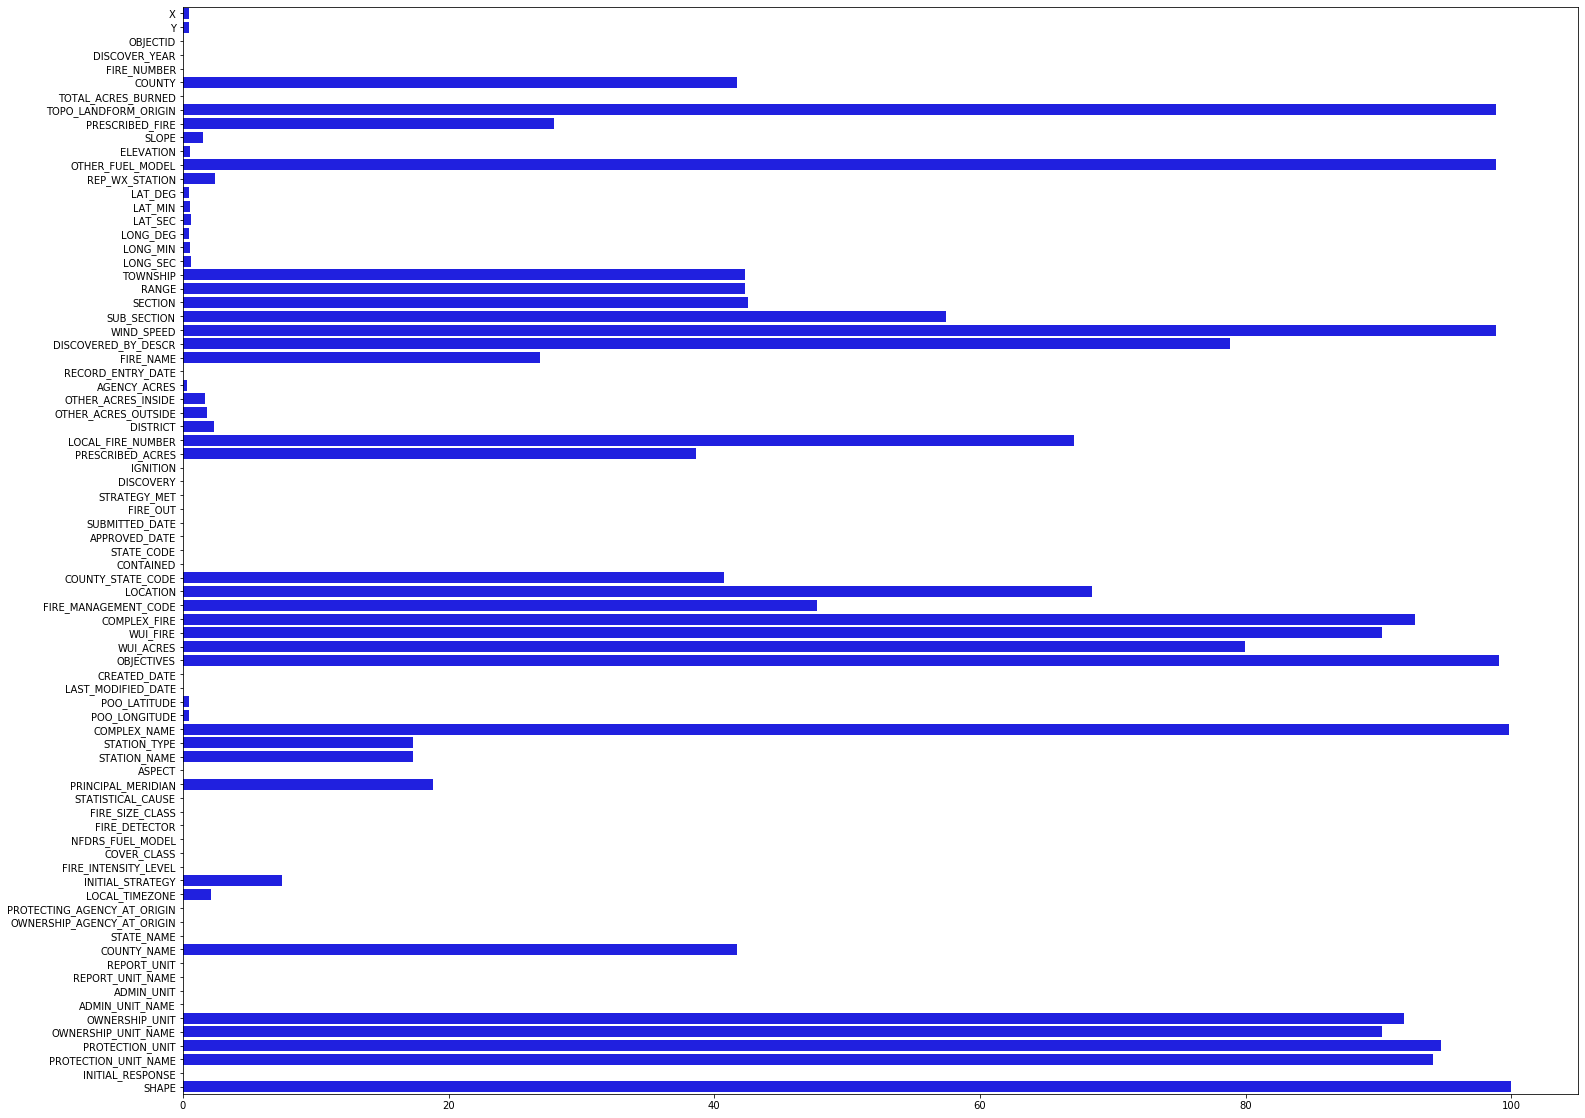

In [8]:
# Plot of null percentage values in each feature of fire dataset
columns = list(fire_df.columns)
plt.figure(figsize=(25, 20))
sns.barplot(x = null_perc, y = columns, color="blue");


### 4. Data Cleaning 

* The dataset has some features with significant null values which otherwise would not have much importance to the analysis

* Hence, dropping these features is necessary to produce correct insights from the data

In [9]:
# A function to drop features with  over 30% null values 

def drop_feature(df):

    rec = df.shape[0]
    dropping_cols = list()
    for col in df.columns:
        null_values = df[col].isnull().sum()
        null_perc = round((null_values/rec) * 100, 2)
        if null_perc > 30:
            dropping_cols.append(col)
    
    df.drop(dropping_cols, axis=1, inplace=True)
    return df

In [10]:
fire_df = drop_feature(fire_df)
fire_df.shape

(329095, 54)

In [11]:
null_perc = percentage_null(fire_df)

X   --   0.5 %
Y   --   0.5 %
OBJECTID   --   0.0 %
DISCOVER_YEAR   --   0.0 %
FIRE_NUMBER   --   0.0 %
TOTAL_ACRES_BURNED   --   0.02 %
PRESCRIBED_FIRE   --   27.94 %
SLOPE   --   1.53 %
ELEVATION   --   0.54 %
REP_WX_STATION   --   2.43 %
LAT_DEG   --   0.48 %
LAT_MIN   --   0.51 %
LAT_SEC   --   0.61 %
LONG_DEG   --   0.49 %
LONG_MIN   --   0.53 %
LONG_SEC   --   0.63 %
FIRE_NAME   --   26.92 %
RECORD_ENTRY_DATE   --   0.0 %
AGENCY_ACRES   --   0.29 %
OTHER_ACRES_INSIDE   --   1.64 %
OTHER_ACRES_OUTSIDE   --   1.85 %
DISTRICT   --   2.34 %
IGNITION   --   0.0 %
DISCOVERY   --   0.0 %
STRATEGY_MET   --   0.0 %
FIRE_OUT   --   0.0 %
SUBMITTED_DATE   --   0.0 %
APPROVED_DATE   --   0.0 %
STATE_CODE   --   0.0 %
CONTAINED   --   0.0 %
CREATED_DATE   --   0.0 %
LAST_MODIFIED_DATE   --   0.0 %
POO_LATITUDE   --   0.5 %
POO_LONGITUDE   --   0.5 %
STATION_TYPE   --   17.36 %
STATION_NAME   --   17.36 %
ASPECT   --   0.0 %
PRINCIPAL_MERIDIAN   --   18.8 %
STATISTICAL_CAUSE   --   0.0 %
FIRE_

In [12]:
# Since location is an important aspect of any fire, dropping fire history data record without location is necessary

fire_df = fire_df.dropna(axis=0, subset=('X', 'Y'))
null_perc = percentage_null(fire_df)

X   --   0.0 %
Y   --   0.0 %
OBJECTID   --   0.0 %
DISCOVER_YEAR   --   0.0 %
FIRE_NUMBER   --   0.0 %
TOTAL_ACRES_BURNED   --   0.02 %
PRESCRIBED_FIRE   --   27.91 %
SLOPE   --   1.51 %
ELEVATION   --   0.54 %
REP_WX_STATION   --   2.13 %
LAT_DEG   --   0.0 %
LAT_MIN   --   0.03 %
LAT_SEC   --   0.13 %
LONG_DEG   --   0.0 %
LONG_MIN   --   0.05 %
LONG_SEC   --   0.15 %
FIRE_NAME   --   27.0 %
RECORD_ENTRY_DATE   --   0.0 %
AGENCY_ACRES   --   0.3 %
OTHER_ACRES_INSIDE   --   1.64 %
OTHER_ACRES_OUTSIDE   --   1.85 %
DISTRICT   --   2.13 %
IGNITION   --   0.0 %
DISCOVERY   --   0.0 %
STRATEGY_MET   --   0.0 %
FIRE_OUT   --   0.0 %
SUBMITTED_DATE   --   0.0 %
APPROVED_DATE   --   0.0 %
STATE_CODE   --   0.0 %
CONTAINED   --   0.0 %
CREATED_DATE   --   0.0 %
LAST_MODIFIED_DATE   --   0.0 %
POO_LATITUDE   --   0.01 %
POO_LONGITUDE   --   0.01 %
STATION_TYPE   --   17.12 %
STATION_NAME   --   17.12 %
ASPECT   --   0.0 %
PRINCIPAL_MERIDIAN   --   18.86 %
STATISTICAL_CAUSE   --   0.0 %
FIRE_S

In [13]:
fire_df.head()

,X,Y,OBJECTID,DISCOVER_YEAR,FIRE_NUMBER,TOTAL_ACRES_BURNED,PRESCRIBED_FIRE,SLOPE,ELEVATION,REP_WX_STATION,...,INITIAL_STRATEGY,LOCAL_TIMEZONE,PROTECTING_AGENCY_AT_ORIGIN,OWNERSHIP_AGENCY_AT_ORIGIN,STATE_NAME,REPORT_UNIT,REPORT_UNIT_NAME,ADMIN_UNIT,ADMIN_UNIT_NAME,INITIAL_RESPONSE
0,-9.656193e+06,4.574523e+06,113087203,2004,11,2.65,N,10.0,800.0,128905.0,...,Suppression,America/Indiana/Tell_City,USFS - USDA Forest Service,2 - State and private inside NF bdy,IN - INDIANA,0912,Hoosier National Forest,912,Hoosier National Forest,2004/02/29 11:15:00+00
1,-9.639341e+06,4.582370e+06,113087204,2001,4,0.20,N,25.0,500.0,128905.0,...,Suppression,America/Indiana/Tell_City,USFS - USDA Forest Service,2 - State and private inside NF bdy,IN - INDIANA,0912,Hoosier National Forest,912,Hoosier National Forest,2001/02/21 14:30:00+00
2,-9.651400e+06,4.567661e+06,113087205,2000,32,1.00,N,10.0,450.0,128905.0,...,Suppression,America/Indiana/Tell_City,USFS - USDA Forest Service,2 - State and private inside NF bdy,IN - INDIANA,0912,Hoosier National Forest,912,Hoosier National Forest,2000/04/28 17:30:00+00
3,-9.619860e+06,4.724060e+06,113087206,1997,4,0.20,N,10.0,800.0,125701.0,...,3 - Control (1983-1998),America/Indiana/Indianapolis,USFS - USDA Forest Service,2 - State and private inside NF bdy,IN - INDIANA,0912,Hoosier National Forest,912,Hoosier National Forest,1997/11/26 18:50:00+00
4,-9.592216e+06,4.720956e+06,113087207,1994,1,2.00,N,5.0,700.0,128905.0,...,3 - Control (1983-1998),America/Indiana/Indianapolis,USFS - USDA Forest Service,1 - National Forest,IN - INDIANA,0912,Hoosier National Forest,912,Hoosier National Forest,1994/03/23 15:30:00+00


In [14]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327462 entries, 0 to 329093
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   X                            327462 non-null  float64
 1   Y                            327462 non-null  float64
 2   OBJECTID                     327462 non-null  int64  
 3   DISCOVER_YEAR                327462 non-null  object 
 4   FIRE_NUMBER                  327462 non-null  object 
 5   TOTAL_ACRES_BURNED           327396 non-null  float64
 6   PRESCRIBED_FIRE              236065 non-null  object 
 7   SLOPE                        322505 non-null  float64
 8   ELEVATION                    325687 non-null  float64
 9   REP_WX_STATION               320471 non-null  float64
 10  LAT_DEG                      327462 non-null  float64
 11  LAT_MIN                      327356 non-null  float64
 12  LAT_SEC                      327020 non-null  float64
 13 

In [15]:
# Selecting columns for analysis in aggregation with the weather data

fire_df = fire_df[['X', 'Y', 'OBJECTID', 'DISCOVER_YEAR', 'TOTAL_ACRES_BURNED', 'PRESCRIBED_FIRE', 'SLOPE', 'ELEVATION', 'FIRE_NAME', 'IGNITION', 'DISCOVERY', 'STRATEGY_MET', 'FIRE_OUT', 'STATION_NAME', 'STATISTICAL_CAUSE', 'FIRE_SIZE_CLASS', 'FIRE_DETECTOR', 'FIRE_INTENSITY_LEVEL', 'STATE_NAME', 'INITIAL_RESPONSE']]

In [16]:
# Renaming the X and Y as latitude and longitude

fire_df.rename(columns={"X":"LATITUDE", "Y":"LONGITUDE"}, inplace=True)

fire_df.head()

,LATITUDE,LONGITUDE,OBJECTID,DISCOVER_YEAR,TOTAL_ACRES_BURNED,PRESCRIBED_FIRE,SLOPE,ELEVATION,FIRE_NAME,IGNITION,DISCOVERY,STRATEGY_MET,FIRE_OUT,STATION_NAME,STATISTICAL_CAUSE,FIRE_SIZE_CLASS,FIRE_DETECTOR,FIRE_INTENSITY_LEVEL,STATE_NAME,INITIAL_RESPONSE
0,-9.656193e+06,4.574523e+06,113087203,2004,2.65,N,10.0,800.0,PONDEROSA FIRE,2004/02/29 10:45:00+00,2004/02/29 11:00:00+00,2004/02/29 11:30:00+00,2004/02/29 11:45:00+00,TIPSAW LAKE,5 - Debris Burning,B - .26-9.99 Acres,5 - Planned Coop,1 - Flame Length 0-2',IN - INDIANA,2004/02/29 11:15:00+00
1,-9.639341e+06,4.582370e+06,113087204,2001,0.20,N,25.0,500.0,TRUMAN ROAD,2001/02/21 14:00:00+00,2001/02/21 14:15:00+00,2001/02/21 14:45:00+00,2001/02/21 15:00:00+00,TIPSAW LAKE,5 - Debris Burning,A - .00-.25 Acres,0 - Others,2 - Flame Length >2-4',IN - INDIANA,2001/02/21 14:30:00+00
2,-9.651400e+06,4.567661e+06,113087205,2000,1.00,N,10.0,450.0,ECHO,2000/04/28 17:00:00+00,2000/04/28 17:15:00+00,2000/04/28 17:55:00+00,2000/04/28 18:00:00+00,TIPSAW LAKE,9 - Miscellaneous,B - .26-9.99 Acres,0 - Others,2 - Flame Length >2-4',IN - INDIANA,2000/04/28 17:30:00+00
3,-9.619860e+06,4.724060e+06,113087206,1997,0.20,N,10.0,800.0,YARD,1997/11/26 18:30:00+00,1997/11/26 18:40:00+00,1997/11/26 19:00:00+00,1997/11/26 19:30:00+00,HARDIN RIDGE,7 - Arson,A - .00-.25 Acres,0 - Others,1 - Flame Length 0-2',IN - INDIANA,1997/11/26 18:50:00+00
4,-9.592216e+06,4.720956e+06,113087207,1994,2.00,N,5.0,700.0,NaN,1994/03/23 15:15:00+00,1994/03/23 15:20:00+00,1994/03/23 16:15:00+00,1994/03/23 17:00:00+00,TIPSAW LAKE,5 - Debris Burning,B - .26-9.99 Acres,5 - Planned Coop,2 - Flame Length >2-4',IN - INDIANA,1994/03/23 15:30:00+00


In [17]:
# Checking the percentage of null values in the selected features

null_perc = percentage_null(fire_df)

LATITUDE   --   0.0 %
LONGITUDE   --   0.0 %
OBJECTID   --   0.0 %
DISCOVER_YEAR   --   0.0 %
TOTAL_ACRES_BURNED   --   0.02 %
PRESCRIBED_FIRE   --   27.91 %
SLOPE   --   1.51 %
ELEVATION   --   0.54 %
FIRE_NAME   --   27.0 %
IGNITION   --   0.0 %
DISCOVERY   --   0.0 %
STRATEGY_MET   --   0.0 %
FIRE_OUT   --   0.0 %
STATION_NAME   --   17.12 %
STATISTICAL_CAUSE   --   0.0 %
FIRE_SIZE_CLASS   --   0.0 %
FIRE_DETECTOR   --   0.0 %
FIRE_INTENSITY_LEVEL   --   0.0 %
STATE_NAME   --   0.0 %
INITIAL_RESPONSE   --   0.0 %


In [18]:
# DISCOVER_YEAR feature has invalid data as we can see below

# The feature includes values such as '0NaN' and year values with three digits as shown below

fire_df['DISCOVER_YEAR'].unique()

array([2004, 2001, 2000, 1997, 1994, 2002, 1999, 1995, 1987, 1988, 1990,
       1992, 1996, 1998, 1986, 2005, 2003, 1993, 1991, 1989, 2015, 1977,
       1973, 1974, 1970, 1981, 1975, 1976, 1983, 1972, 1971, 1985, 1984,
       1980, 1978, 2010, 1982, 2009, 1979, 2006, 2011, 2007, 1005, 2024,
       2013, 2012, 2008, 1966, 1965, 1964, 1963, 1968, 1967, 1969, 1959,
       1960, 1962, 1954, 1956, 1961, 1955, 1958, 1957, 1953, 1952, 1948,
       1949, 2016, 2014, 2017, 2018, 2019, 219, '2017', '2014', '2013',
       '1989', '2000', '1986', '2015', '2019', '1995', '1996', '1990',
       '2007', '2006', '1994', '1971', '1988', '2004', '2012', '1987',
       '1970', '2001', '1999', '1993', '1991', '2018', '2002', '2003',
       '2010', '2008', '1964', '1969', '1992', '1998', '1975', '1974',
       '1976', '1972', '1973', '2016', '1997', '2005', '2009', '1966',
       '1967', '1963', '2011', '1984', '0NaN', '1977', '1979', '1982',
       '1983', '1978', '1961', '1981', '1960', '1985', '1965', 2

In [19]:
# DISCOVERY_YEAR feature validation

fire_df = fire_df[fire_df['DISCOVER_YEAR'] != '0NaN']
fire_df['DISCOVER_YEAR'] = fire_df['DISCOVER_YEAR'].astype(str).astype(int)
fire_df = fire_df[fire_df['DISCOVER_YEAR'] > 999]
fire_df['DISCOVER_YEAR'].unique()

array([2004, 2001, 2000, 1997, 1994, 2002, 1999, 1995, 1987, 1988, 1990,
       1992, 1996, 1998, 1986, 2005, 2003, 1993, 1991, 1989, 2015, 1977,
       1973, 1974, 1970, 1981, 1975, 1976, 1983, 1972, 1971, 1985, 1984,
       1980, 1978, 2010, 1982, 2009, 1979, 2006, 2011, 2007, 1005, 2024,
       2013, 2012, 2008, 1966, 1965, 1964, 1963, 1968, 1967, 1969, 1959,
       1960, 1962, 1954, 1956, 1961, 1955, 1958, 1957, 1953, 1952, 1948,
       1949, 2016, 2014, 2017, 2018, 2019, 1951, 1950])

In [20]:
# Moreover, features representing time are all treated as string objects as shown below

# Hence, converting them to datetime is essential for futher analysis

fire_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327456 entries, 0 to 329093
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   LATITUDE              327456 non-null  float64
 1   LONGITUDE             327456 non-null  float64
 2   OBJECTID              327456 non-null  int64  
 3   DISCOVER_YEAR         327456 non-null  int64  
 4   TOTAL_ACRES_BURNED    327390 non-null  float64
 5   PRESCRIBED_FIRE       236065 non-null  object 
 6   SLOPE                 322500 non-null  float64
 7   ELEVATION             325682 non-null  float64
 8   FIRE_NAME             239036 non-null  object 
 9   IGNITION              327456 non-null  object 
 10  DISCOVERY             327456 non-null  object 
 11  STRATEGY_MET          327456 non-null  object 
 12  FIRE_OUT              327456 non-null  object 
 13  STATION_NAME          271396 non-null  object 
 14  STATISTICAL_CAUSE     327456 non-null  object 
 15  

In [21]:
# Validation of features representing time 

# Converting features from string to datetime data type

fire_df['IGNITION'] = pd.to_datetime(fire_df['IGNITION'], errors='coerce')
fire_df['DISCOVERY'] = pd.to_datetime(fire_df['DISCOVERY'], errors='coerce')
fire_df['STRATEGY_MET'] = pd.to_datetime(fire_df['STRATEGY_MET'], errors='coerce')
fire_df['FIRE_OUT'] = pd.to_datetime(fire_df['FIRE_OUT'], errors='coerce')
fire_df['INITIAL_RESPONSE'] = pd.to_datetime(fire_df['INITIAL_RESPONSE'], errors='coerce')
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327456 entries, 0 to 329093
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   LATITUDE              327456 non-null  float64            
 1   LONGITUDE             327456 non-null  float64            
 2   OBJECTID              327456 non-null  int64              
 3   DISCOVER_YEAR         327456 non-null  int64              
 4   TOTAL_ACRES_BURNED    327390 non-null  float64            
 5   PRESCRIBED_FIRE       236065 non-null  object             
 6   SLOPE                 322500 non-null  float64            
 7   ELEVATION             325682 non-null  float64            
 8   FIRE_NAME             239036 non-null  object             
 9   IGNITION              327445 non-null  datetime64[ns, UTC]
 10  DISCOVERY             327456 non-null  datetime64[ns, UTC]
 11  STRATEGY_MET          327456 non-null  datetime64[ns

In [22]:
fire_df['FIRE_SIZE_CLASS'].unique()

array(['B -  .26-9.99 Acres', 'A -  .00-.25 Acres', 'C -  10-99.99 Acres',
       'F -  1000-4999.99 Acres', 'E -  300-999.99 Acres',
       'G -  >5000 Acres', 'D -  100-299.99 Acres', ' -  '], dtype=object)

In [23]:
fire_class_idx = { 'A': '0.00 - 0.25 Acres', 
                   'B': '0.26 - 0.99 Acres',
                   'C': '10 - 99.99 Acres', 
                   'D': '100 - 299.99 Acres',
                   'E': '300 - 999.99 Acres',
                   'G': '> 5000 Acres' }

fire_class_idx_df = pd.DataFrame.from_dict(fire_class_idx, orient='index', columns=['Size'])
fire_class_idx_df.head()

,Size
A,0.00 - 0.25 Acres
B,0.26 - 0.99 Acres
C,10 - 99.99 Acres
D,100 - 299.99 Acres
E,300 - 999.99 Acres


In [24]:
# Splitting fire data into an index format

def fire_class_valid(fire_class_str):
    return fire_class_str.split(" - ")[1].strip()

# Cleaning fire size class
fire_df['FIRE_SIZE_CLASS'] = fire_df['FIRE_SIZE_CLASS'].apply(fire_class_valid)

fire_df['FIRE_SIZE_CLASS'].unique()

array(['.26-9.99 Acres', '.00-.25 Acres', '10-99.99 Acres',
       '1000-4999.99 Acres', '300-999.99 Acres', '>5000 Acres',
       '100-299.99 Acres', ''], dtype=object)

In [25]:
# Fire detector validation
def fire_detector_valid(fire_class_str):
    return fire_class_str.split(" - ")[1].strip()

# Cleaning fire detector
fire_df['FIRE_DETECTOR'] = fire_df['FIRE_DETECTOR'].apply(fire_detector_valid)

fire_df['FIRE_DETECTOR'].unique()

array(['Planned Coop', 'Others', 'Agency Patrol', 'Other Agency Employee',
       'Other Air Obs', 'Agency Lookout', 'Agency Air Obs',
       'Agency Permittee', '', 'Non-Agency Lookout', 'Resident',
       'Infrared Detect', 'Roving non-fire patrol',
       'On duty agency employee', 'Cooperator or Coop employ', 'Passerby',
       'Aircraft on regular route', 'Tenant, permittee',
       'Aircraft in vicinity', 'Rpt Agency roving patrol',
       'Visitor in area', 'Neighbor', 'Agency Patrol aircraft',
       'Contractor personnel', 'Occupant, type unknown/NR',
       'Coop Agency Patrol', 'Coop Agency fire guard',
       'Coop patrol aircraft', 'Unclassified detection',
       'Rpt Agency fire guard', 'Coop Agency Lookout',
       'Aerial det, type unkwn/NR', 'Building/Property guard',
       'Rpt Agency Lookout', 'Detector known, unclassed',
       'Watchman, not class above', 'Aerial Infrared detection',
       'Fire detected, no alarm', 'Satellite detection',
       'Auto detect sys

In [26]:
# FIRE INTENSITY VALIDATION

def fire_intensity_valid(fire_class_str):
    return fire_class_str.split(" - ")[1].strip()

# cleaning fire intensity level data
fire_df['FIRE_INTENSITY_LEVEL'] = fire_df['FIRE_INTENSITY_LEVEL'].apply(fire_intensity_valid)

fire_df['FIRE_INTENSITY_LEVEL'].unique()

array(["Flame Length 0-2'", "Flame Length >2-4'", "Flame Length >4-6'",
       "Flame Length >8-12'", "Flame Length >6-8'", "Flame Length >12'",
       '', 'HISTORICAL'], dtype=object)

In [27]:
# STATE NAME VALIDATION

def state_name_valid(fire_class_str):
    return fire_class_str.split(" - ")[1].strip()

# cleaning state name data
fire_df['STATE_NAME'] = fire_df['STATE_NAME'].apply(state_name_valid)

fire_df['STATE_NAME'].unique()

array(['INDIANA', 'ILLINOIS', 'NEVADA', 'OHIO', 'OKLAHOMA', 'CALIFORNIA',
       'NEBRASKA', 'MISSOURI', 'UTAH', 'COLORADO', 'MONTANA',
       'WEST VIRGINIA', 'ARIZONA', 'NEW YORK', 'TENNESSEE',
       'SOUTH DAKOTA', 'GEORGIA', 'FLORIDA', 'ARKANSAS', 'NEW HAMPSHIRE',
       'NEW MEXICO', 'WISCONSIN', 'VIRGINIA', 'IDAHO', 'WYOMING',
       'VERMONT', 'MICHIGAN', 'OREGON', 'KENTUCKY', 'WASHINGTON',
       'LOUISIANA', 'MINNESOTA', 'TEXAS', 'NORTH CAROLINA',
       'SOUTH CAROLINA', 'PENNSYLVANIA', 'MISSISSIPPI', 'ALASKA',
       'ALABAMA', 'KANSAS', 'NORTH DAKOTA', '', 'MAINE', 'INTERNATIONAL',
       'MEXICO', 'BC'], dtype=object)

In [28]:
# validating statistical cause 

def stat_cause_valid(stat_cause_str):
    return stat_cause_str.split(" - ")[1].strip()

# cleaning statistical cause feature
fire_df['STATISTICAL_CAUSE'] = fire_df['STATISTICAL_CAUSE'].apply(stat_cause_valid)


fire_df['STATISTICAL_CAUSE'].unique()

array(['Debris Burning', 'Miscellaneous', 'Arson', 'Campfire',
       'Lightning', 'Equipment Use', 'Railroad', 'Smoking', 'Children',
       ''], dtype=object)

In [29]:
# Exporting fire history data to csv format

fire_df.to_csv("Fire_History_Data.csv", index=False, header=False)